# Workshop: Convolution
Convolution, Kernel, Pooling

# Library

In [4]:
# check opencv
!conda list opencv


(base) C:\Users\Asus\Downloads\deep_learning\lesson_code>@SET PATH=!_sysp!;!_sysp!\Library\mingw-w64\bin;!_sysp!\Library\usr\bin;!_sysp!\Library\bin;!_sysp!\Scripts;!_sysp!\bin;%PATH%


The input line is too long.
The syntax of the command is incorrect.


In [5]:
!pip show opencv-python

Name: opencv-python
Version: 4.6.0.66
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: 
Author-email: 
License: MIT
Location: c:\users\asus\anaconda3\lib\site-packages
Requires: numpy, numpy, numpy
Required-by: 


In [6]:
# Install
!pip install opencv-python
!conda install -c conda-forge opencv -y


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



(base) C:\Users\Asus\Downloads\deep_learning\lesson_code>@SET PATH=!_sysp!;!_sysp!\Library\mingw-w64\bin;!_sysp!\Library\usr\bin;!_sysp!\Library\bin;!_sysp!\Scripts;!_sysp!\bin;%PATH%


The input line is too long.
The syntax of the command is incorrect.


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convolution & Kernel

In [8]:
image = np.array([[1, 0, 2, 1, 0],           # ข้อมูลใน pixel สมมุติ
                  [0, 2, 3, 0, 1],
                  [1, 0, 1, 1, 2],
                  [0, 2, 2, 0, 3],                
                  [0, 4, 1, 2, 0]])

image = image / 5.0              # ทำ Normalize ให้ pixel อยู่ในช่วง 0 - 1
image

array([[0.2, 0. , 0.4, 0.2, 0. ],
       [0. , 0.4, 0.6, 0. , 0.2],
       [0.2, 0. , 0.2, 0.2, 0.4],
       [0. , 0.4, 0.4, 0. , 0.6],
       [0. , 0.8, 0.2, 0.4, 0. ]])

In [9]:
np.max(image)

0.8

In [10]:
# สร้าง Kernel (filter, mask)
kernel1 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

im2 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

In [12]:
im2_int = (im2*5).astype('int')  # คูณ 5 และ แปลงเเป็น int 
im2_int                          # ได้ Feature Map

array([[ 0,  7, -3, -6,  0],
       [ 0,  4,  0, -3,  0],
       [ 0,  5, -3,  0,  0],
       [ 0,  3, -3,  0,  0],
       [ 0,  5, -6,  0,  0]])

# Convolution

In [ ]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

# !ls
!ls '/content/drive/MyDrive/Colab Notebooks/datasets'

## Read image

In [ ]:
import numpy as np
from PIL import Image, ImageOps

imgfile = '/content/drive/MyDrive/Colab Notebooks/datasets/building1.jpg' # 'feature_map1.jpg'

image = Image.open(imgfile).convert('L')
image

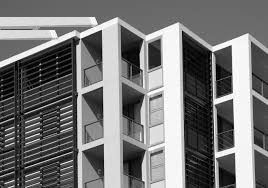

In [14]:
# Conda
import numpy as np
from PIL import Image, ImageOps

imgfile = 'data/building1.jpg'     #  input image

image = Image.open(imgfile).convert('L')  # convert to grayscale
image

## Kernel

In [15]:
kernel1 = np.array([[-1, 0, 1], # v
                    [-3, 0, 3],
                    [-1, 0, 1]])

In [20]:
kernel1 = np.array([[-1,-3, -1], # h
                    [0,  0,  0],
                    [1,  3,  1]])

In [24]:
kernel1 = np.array([[0,  1,  3], # \
                    [-1, 0, 1],
                    [-3,-1,  0]])

In [28]:
kernel1 = np.array([[-3, -1, 0], # /
                    [-1,  0, 1],
                    [0,  1, 3]])

In [32]:
kernel1 = np.array([[-1, -1, -1], # edge
                    [-1, 8, -1],
                    [-1, -1, -1]])

## Convolution2D

In [33]:
from PIL import Image, ImageOps

pixel = np.array(image)
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernel1)  # Feature Map

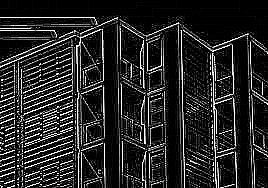

In [34]:
Image.fromarray(fea_map)

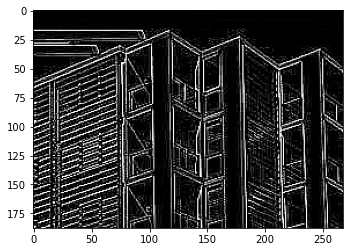

In [35]:
# use Matplot lib
plt.imshow(fea_map, cmap=plt.cm.gray)
plt.show()

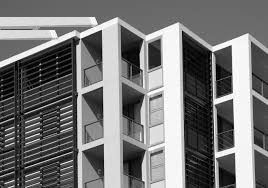

In [19]:
image

# Pooling

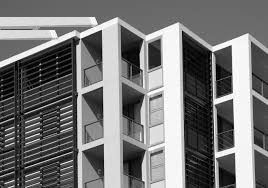

In [36]:
# import numpy as np
from PIL import Image, ImageOps

imgfile = 'data/building1.jpg'     #  input image

image = Image.open(imgfile).convert('L')
image

In [37]:
pixel = np.array(image)
pixel.shape

(188, 268)

1/1 [==============================] - 0s 42ms/step


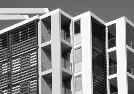

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D 
from PIL import Image, ImageOps

arr = pixel.reshape(1, 188, 268, 1)  # 1มิติ จาก 4มิติ x row x hight x 1มิติ จาก 3มิติ
   
model = Sequential() 
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(MaxPool2D(pool_size=(3, 3)))
   
output = model.predict(arr) 
 
output = np.squeeze(output) 
Image.fromarray(output)

In [ ]:
from IPython.display import Image
Image(filename='images/ch14 CNN/data.png')

In [40]:
output.shape

(94, 134)

1/1 [==============================] - 0s 44ms/step


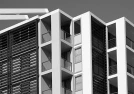

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D 
from PIL import Image, ImageOps

pixel2 = pixel.astype('float')
arr = pixel2.reshape(1, 188, 268, 1)  
   
model = Sequential() 
model.add(AveragePooling2D(pool_size=(2, 2)))

output = model.predict(arr).astype('uint8') 
 
output = np.squeeze(output) 
Image.fromarray(output)

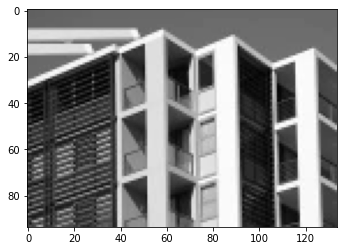

In [42]:
plt.imshow(output, cmap=plt.cm.gray)
plt.show()

In [43]:
output.shape

(94, 134)

In [44]:
output

array([[ 95,  95,  95, ..., 103, 103, 103],
       [ 95,  95,  95, ..., 103, 103, 103],
       [ 95,  95,  95, ..., 103, 103, 103],
       ...,
       [ 51,  52, 127, ...,  54,  57,  58],
       [ 59,  25,  68, ...,  42,  46,  54],
       [ 62,  75,  62, ...,  53,  37,  48]], dtype=uint8)

# Squeeze, Max & Avg Pooling

In [45]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D 
 
image = np.array([[2, 3, 4, 2], 
                  [8, 5, 5, 1], 
                  [6, 7, 9, 4], 
                  [3, 1, 4, 5]]) 
 
arr = image.reshape(1, 4, 4, 1) 

## Max Pooling

In [46]:
model = Sequential() 
model.add(MaxPool2D(pool_size=(2, 2))) 

output = model.predict(arr)
output.shape

print(output)

1/1 [==============================] - 0s 41ms/step
[[[[8]
   [5]]

  [[7]
   [9]]]]


In [47]:
output.shape

(1, 2, 2, 1)

In [48]:
output = np.squeeze(output) 
output

array([[8, 5],
       [7, 9]])

In [49]:
output.shape

(2, 2)

## Average Pooling

In [50]:
model = Sequential() 

model.add(AveragePooling2D(pool_size=(2, 2))) 
output = model.predict(arr.astype('float'))
print(output)

1/1 [==============================] - 0s 44ms/step
[[[[4.5 ]
   [3.  ]]

  [[4.25]
   [5.5 ]]]]


In [51]:
output.shape

(1, 2, 2, 1)

In [52]:
output = np.squeeze(output) 
output

array([[4.5 , 3.  ],
       [4.25, 5.5 ]], dtype=float32)

In [53]:
output.shape

(2, 2)